# ESTUDIO DE CASO

Una empresa de logística especializada en la distribución de insumos como parte de la cadena de suministros de otras empresas productoras ubicadas en el norte y sur del país, quiere conocer qué tan probable es que la empresa supere los $30,000 de facturación este año. 

Esta problemática es de interés para muchas empresas que operan a gran escala y en diferentes ubicaciones geográficas, ya que esto les permite conocer cuáles son las zonas de oportunidad donde pueden realizar reingenierías de procesos, inversión en infraestructura, mejorar los métodos de marketing, etcétera.

Contamos con los datos de las últimas 50 facturas realizadas el año anterior junto con la ubicación geográfica del contratista.

In [9]:
#Importamos las librerías que podríamos necesitar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [10]:
df = pd.read_csv('Ejercicio1.csv', index_col = 0)
df.head()

,Monto factura,Zona
ID,,
1,27391.4,NORTE
2,15925.6,NORTE
3,33742.5,NORTE
4,36444.8,NORTE
5,22172.9,SUR


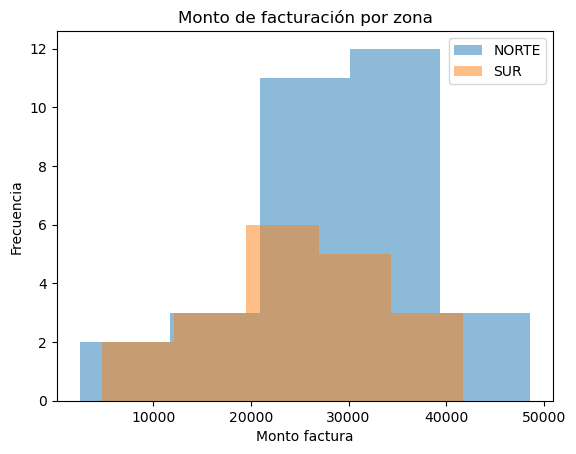

In [14]:
# realizamos un histograma por zona para visualizar la distribución de los datos.
df.groupby('Zona')['Monto factura'].plot(kind='hist', bins=5, alpha=0.5, legend=True)
plt.xlabel('Monto factura')
plt.ylabel('Frecuencia')
plt.title('Monto de facturación por zona')
plt.show()

Podemos decir que ambas zonas tienen cierta simetría y forma de campana, por lo que podemos usar la distribución normal para modelar la probabilidad del monto de facturación.


In [15]:
# Calcular los parámetros por zona
zona_norte = df[df['Zona'] == 'NORTE']
zona_sur = df[df['Zona'] == 'SUR']

mean_norte = zona_norte['Monto factura'].mean()
std_norte = zona_norte['Monto factura'].std()

mean_sur = zona_sur['Monto factura'].mean()
std_sur = zona_sur['Monto factura'].std()

# Calcular el z-score por zona
meta = 30000

z_score_norte = (meta - mean_norte) / std_norte
z_score_sur = (meta - mean_sur) / std_sur

# Calcular la probabilidad utilizando la función de distribución acumulativa (CDF)
probability_norte = 1 - norm.cdf(z_score_norte)
probability_sur = 1 - norm.cdf(z_score_sur)

# Imprimir las probabilidades por zona
print(f"Probabilidad en la zona Norte: {probability_norte:.2%}")
print(f"Probabilidad en la zona Sur: {probability_sur:.2%}")


Probabilidad en la zona Norte: 44.02%
Probabilidad en la zona Sur: 29.44%
